# EDA - World Population Trends
## Objective
The goal of this analysis is to explore global population trends across continents,
identify growth patterns, data quality issues, and potential drivers of population change
to support demographic and strategic planning decisions.

The analysis aims to support data-driven insights by:
- Evaluating population growth dynamics over multiple decades
- Identifying continent-level differences and trends
- Detecting outliers and potential data quality issues
- Creating derived KPIs to better understand relative growth

In [5]:
import pandas as pd # to work with tables
import seaborn as sns # for statistical charts
import matplotlib.pyplot as plt # for basic charts

In [6]:
df = pd.read_csv(r"C:\Users\Utente\OneDrive - Università degli Studi di Parma\Desktop\Elena\Data Analysis\Python\EDA\world_population.csv")
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [24]:
# Missing values
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [10]:
## Data Quality & Integrity Checks
# These checks help identify potential data issues that could affect trend analysis and ensure the dataset is suitable for downstream analytics and reporting.

In [7]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [8]:
# Check for negative or zero population values
(df[['1970 Population', '2022 Population']] <= 0).sum()

1970 Population    0
2022 Population    0
dtype: int64

In [9]:
# Logical consistency: countries where population decreased from 1970 to 2022
(df['2022 Population'] < df['1970 Population']).sum()

np.int64(14)

In [25]:
# Describe one particular column
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [19]:
# Sort by the column 2022 Population, showing the first 10 columns of the result
df.sort_values(by= '2022 Population', ascending = False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,982372466.0,822534450.0,9706961.0,146.8933,1.0000,17.88
92,2,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,NaN,NaN,557501301.0,3287590.0,431.0675,1.0068,17.77
221,3,USA,United States,"Washington, D.C.",North America,3.382899e+08,3.359420e+08,3.246078e+08,3.111828e+08,2.823986e+08,2.480837e+08,223140018.0,200328340.0,9372610.0,36.0935,1.0038,4.24
93,4,IDN,Indonesia,Jakarta,Asia,2.755013e+08,2.718580e+08,2.590920e+08,2.440162e+08,2.140724e+08,1.821599e+08,148177096.0,115228394.0,1904569.0,144.6529,1.0064,3.45
156,5,PAK,Pakistan,Islamabad,Asia,2.358249e+08,2.271967e+08,2.109693e+08,1.944545e+08,1.543699e+08,1.154141e+08,80624057.0,59290872.0,881912.0,267.4018,1.0191,2.96
149,6,NGA,Nigeria,Abuja,Africa,2.185412e+08,2.083274e+08,1.839958e+08,1.609529e+08,1.228520e+08,9.521426e+07,72951439.0,55569264.0,923768.0,236.5759,1.0241,2.74
27,7,BRA,Brazil,Brasilia,South America,2.153135e+08,2.131963e+08,2.051882e+08,1.963535e+08,1.758737e+08,1.507064e+08,122288383.0,96369875.0,8515767.0,25.2841,1.0046,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,1.711864e+08,1.674210e+08,1.578300e+08,1.483911e+08,1.291933e+08,1.071477e+08,83929765.0,67541860.0,147570.0,1160.0350,1.0108,2.15
171,9,RUS,Russia,Moscow,Europe,1.447133e+08,1.456173e+08,1.446684e+08,1.432426e+08,1.468448e+08,1.480057e+08,138257420.0,130093010.0,17098242.0,8.4636,0.9973,1.81
131,10,MEX,Mexico,Mexico City,North America,1.275041e+08,1.259983e+08,1.201499e+08,1.125324e+08,9.787344e+07,8.172043e+07,67705186.0,50289306.0,1964375.0,64.9082,1.0063,1.60


In [26]:
## Feature Engineering
# To enhance the analysis, new KPIs are created to better capture population dynamics and enable relative comparisons across countries and regions.

In [27]:
# Absolute population growth from 1970 to 2022
df['population_growth_abs'] = df['2022 Population'] - df['1970 Population']

# Relative population growth rate
df['population_growth_rate'] = (
    (df['2022 Population'] / df['1970 Population']) - 1
)

In [28]:
df[['population_growth_abs', 'population_growth_rate']].describe()

,population_growth_abs,population_growth_rate
count,226.00,226.00
mean,18695848.60,1.89
std,73699871.66,2.85
min,-7577347.00,-0.63
25%,76935.75,0.32
50%,2223520.50,1.32
75%,12257717.50,2.61
max,859671872.00,30.67


In [18]:
# Correlation
df.corr(numeric_only=True)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.357989,-0.356283,-0.352850,-0.350009,-0.342095,-0.333014,-0.328620,-0.335737,-0.384854,0.128994,-0.220197,-0.358464
2022 Population,-0.357989,1.000000,0.999946,0.999492,0.998633,0.994602,0.991124,0.986675,0.973135,0.452812,-0.028761,-0.022059,0.999999
2020 Population,-0.356283,0.999946,1.000000,0.999764,0.999108,0.995582,0.992557,0.988392,0.975245,0.454902,-0.027802,-0.025976,0.999944
2015 Population,-0.352850,0.999492,0.999764,1.000000,0.999784,0.997343,0.994968,0.991346,0.979413,0.458101,-0.027740,-0.031150,0.999489
2010 Population,-0.350009,0.998633,0.999108,0.999784,1.000000,0.998595,0.996716,0.993628,0.983050,0.461498,-0.026635,-0.038262,0.998630
2000 Population,-0.342095,0.994602,0.995582,0.997343,0.998595,1.000000,0.999192,0.997247,0.990959,0.473137,-0.026341,-0.052041,0.994598
1990 Population,-0.333014,0.991124,0.992557,0.994968,0.996716,0.999192,1.000000,0.999257,0.997158,0.524392,-0.032348,-0.066718,0.991102
1980 Population,-0.328620,0.986675,0.988392,0.991346,0.993628,0.997247,0.999257,1.000000,0.999251,0.530726,-0.032167,-0.077794,0.986652
1970 Population,-0.335737,0.973135,0.975245,0.979413,0.983050,0.990959,0.997158,0.999251,1.000000,0.509942,-0.027523,-0.080020,0.973143
Area (km²),-0.384854,0.452812,0.454902,0.458101,0.461498,0.473137,0.524392,0.530726,0.509942,1.000000,-0.063545,-0.012829,0.453305


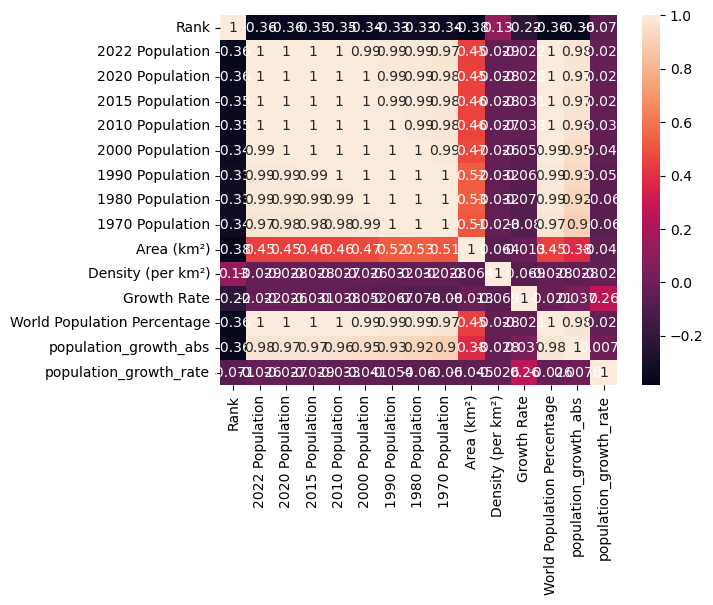

In [30]:
sns.heatmap(df.corr(numeric_only=True), annot= True)
plt.show()

# population across the years show very strong positive correlation
# area has a moderate positive correlation with population
# population density shows very weak correlation with total population (highly populated countries are not necessarily dense, and small countries can be very dense)
# growth rate has little to no correlation with total population (fast-growing countries aren’t always the most populous)

In [31]:
## Which continents experienced the highest population growth?
# This analysis compares both absolute and relative population growth across continents to identify long-term demographic patterns.

In [32]:
continent_growth = df.groupby('Continent')[[
    'population_growth_abs',
    'population_growth_rate'
]].mean().sort_values(by='population_growth_rate', ascending=False)

continent_growth

,population_growth_abs,population_growth_rate
Continent,,
Asia,54060435.06,3.14
Africa,19342110.81,2.99
South America,17419246.57,1.45
North America,7121538.25,1.42
Oceania,1161436.14,1.16
Europe,1748260.69,0.30


<Axes: title={'center': 'Average Population Growth Rate by Continent'}, xlabel='Continent'>

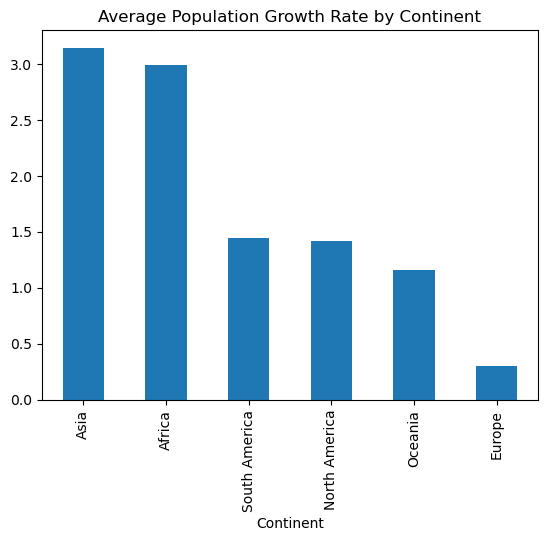

In [33]:
continent_growth['population_growth_rate'].plot(
    kind='bar',
    title='Average Population Growth Rate by Continent'
)

In [34]:
# The results highlight significant differences in growth dynamics between continents, with some regions experiencing rapid relative growth while others show stagnation.

In [45]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [17]:
# Flip rows and columns
df3 = df2.transpose()
df3

Continent,Asia,South America,Africa,Europe,North America,Oceania
1970 Population,4.383988e+07,1.378194e+07,6.567175e+06,1.311848e+07,7.885865e+06,8.469683e+05
1980 Population,4.027833e+07,1.727064e+07,8.586032e+06,1.420000e+07,9.207334e+06,9.965322e+05
1990 Population,4.864000e+07,2.122474e+07,1.137696e+07,1.478520e+07,1.053166e+07,1.162775e+06
2000 Population,8.058084e+07,2.501589e+07,1.459837e+07,1.481769e+07,1.215174e+07,1.357512e+06
2010 Population,8.908777e+07,2.678940e+07,1.889820e+07,1.471228e+07,1.356802e+07,1.613164e+06
2015 Population,8.916500e+07,2.950960e+07,2.141970e+07,1.502745e+07,1.425960e+07,1.756664e+06
2020 Population,9.495513e+07,3.082357e+07,2.387144e+07,1.491584e+07,1.485591e+07,1.910149e+06
2022 Population,9.632739e+07,3.120119e+07,2.545588e+07,1.505537e+07,1.500740e+07,2.046386e+06


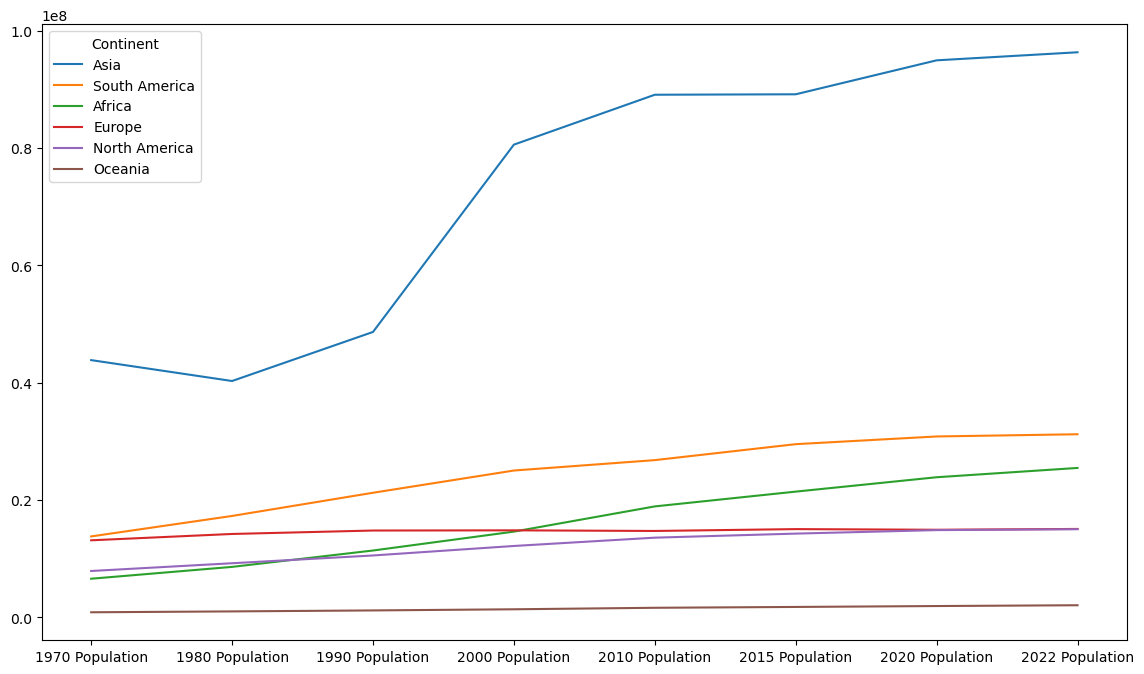

In [22]:
df3.plot(figsize=(14, 8))
plt.show()

In [37]:
## Outlier Analysis
# Outliers are analyzed to identify countries with unusually high or low population growth, which may indicate unique demographic, economic, or data-related factors.

<Axes: >

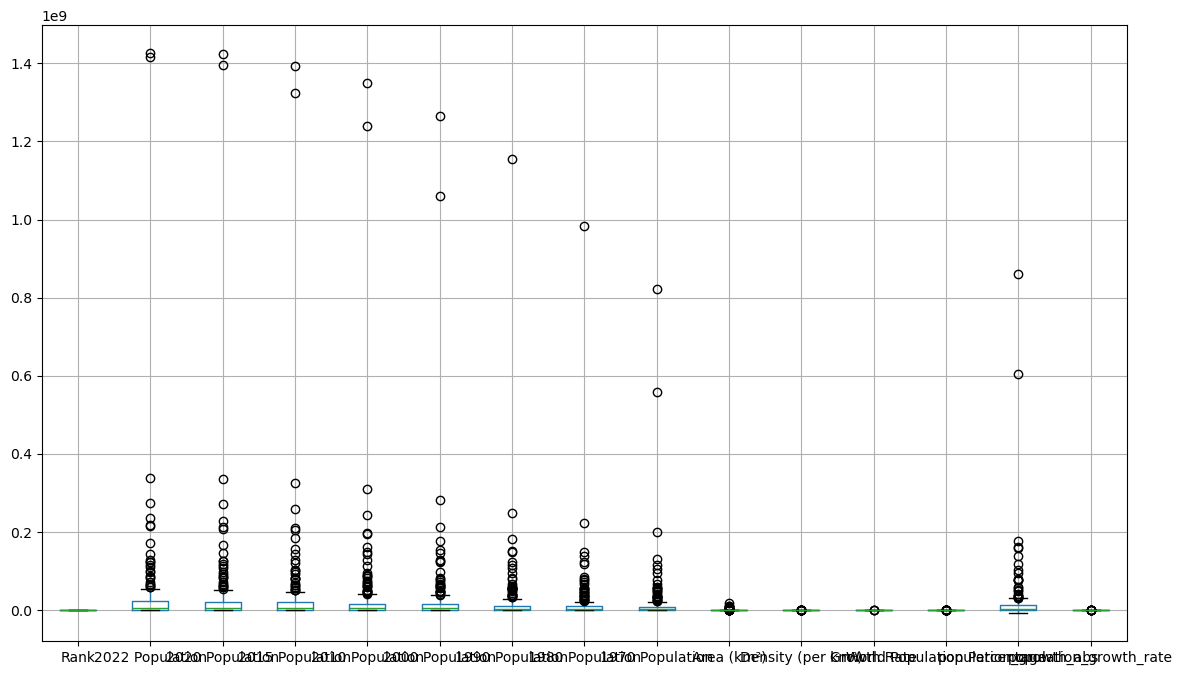

In [36]:
df.boxplot(figsize=(14, 8))

In [38]:
df.sort_values('population_growth_rate', ascending=False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,population_growth_abs,population_growth_rate
219,97,ARE,United Arab Emirates,Abu Dhabi,Asia,9441129.00,9287289.00,8916899.00,8481771.00,3275333.00,1900151.00,1014048.00,298084.00,83600.00,112.93,1.01,0.12,9143045.00,30.67
167,143,QAT,Qatar,Doha,Asia,2695122.00,2760385.00,2414573.00,1713504.00,645937.00,441675.00,277450.00,118007.00,11586.00,232.62,1.00,0.03,2577115.00,21.84
130,182,MYT,Mayotte,Mamoudzou,Africa,326101.00,305587.00,249545.00,211786.00,159215.00,92659.00,52233.00,35383.00,374.00,871.93,1.03,0.00,290718.00,8.22
215,212,TCA,Turks and Caicos Islands,Cockburn Town,North America,45703.00,44276.00,36538.00,29726.00,18744.00,11709.00,7598.00,5665.00,948.00,48.21,1.01,0.00,40038.00,7.07
52,160,DJI,Djibouti,Djibouti,Africa,1120849.00,1090156.00,1006259.00,919199.00,742033.00,577173.00,324121.00,144379.00,23200.00,48.31,1.01,0.01,976470.00,6.76
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.00,556048.00,491824.00,413296.00,270375.00,178529.00,116775.00,76371.00,266000.00,2.17,1.02,0.01,499615.00,6.54
104,83,JOR,Jordan,Amman,Asia,11285869.00,10928721.00,9494246.00,6931258.00,5056174.00,3480587.00,2216903.00,1557374.00,89342.00,126.32,1.01,0.14,9728495.00,6.25
188,214,SXM,Sint Maarten,Philipsburg,North America,44175.00,43621.00,40205.00,33034.00,30489.00,27845.00,12243.00,6260.00,34.00,1299.26,1.00,0.00,37915.00,6.06
155,127,OMN,Oman,Muscat,Asia,4576298.00,4543399.00,4191776.00,2881914.00,2344253.00,1804524.00,1017462.00,670693.00,309500.00,14.79,1.01,0.06,3905605.00,5.82
15,154,BHR,Bahrain,Manama,Asia,1472233.00,1477469.00,1362142.00,1213645.00,711442.00,517418.00,362595.00,222555.00,765.00,1924.49,1.01,0.02,1249678.00,5.62


In [39]:
df.sort_values('population_growth_rate').head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,population_growth_abs,population_growth_rate
150,232,NIU,Niue,Alofi,Oceania,1934.00,1942.00,1847.00,1812.00,2074.00,2533.00,3637.00,5185.00,260.00,7.44,1.00,0.00,-3251.00,-0.63
137,230,MSR,Montserrat,Brades,North America,4390.00,4500.00,5059.00,4938.00,5138.00,10805.00,11452.00,11402.00,102.00,43.04,0.99,0.00,-7012.00,-0.61
226,234,VAT,Vatican City,Vatican City,Europe,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,510.00,1.00,0.00,-242.00,-0.32
111,151,LVA,Latvia,Riga,Europe,1850651.00,1897052.00,1991955.00,2101530.00,2392530.00,2689391.00,2572037.00,2397414.00,64559.00,28.67,0.99,0.02,-546763.00,-0.23
30,108,BGR,Bulgaria,Sofia,Europe,6781953.00,6979175.00,7309253.00,7592273.00,8097691.00,8767778.00,8980606.00,8582950.00,110879.00,61.17,0.98,0.09,-1800997.00,-0.21
44,223,COK,Cook Islands,Avarua,Oceania,17011.00,17029.00,17695.00,17212.00,15897.00,17123.00,17651.00,20470.00,236.00,72.08,1.00,0.00,-3459.00,-0.17
218,38,UKR,Ukraine,Kiev,Europe,39701739.00,43909666.00,44982564.00,45683020.00,48879755.00,51589817.00,49973920.00,47279086.00,603500.00,65.79,0.91,0.50,-7577347.00,-0.16
25,137,BIH,Bosnia and Herzegovina,Sarajevo,Europe,3233526.00,3318407.00,3524324.00,3811088.00,4179350.00,4494310.00,4199820.00,3815561.00,51209.00,63.14,0.99,0.04,-582035.00,-0.15
117,141,LTU,Lithuania,Vilnius,Europe,2750055.00,2820267.00,2963765.00,3139019.00,3599637.00,3785847.00,3521206.00,3210147.00,65300.00,42.11,0.99,0.03,-460092.00,-0.14
133,135,MDA,Moldova,Chisinau,Europe,3272996.00,3084847.00,3277388.00,3678186.00,4251573.00,4480199.00,4103240.00,3711140.00,33846.00,96.70,1.07,0.04,-438144.00,-0.12


In [40]:
# These outliers warrant further investigation and may represent strategic focus areas or potential data validation needs.

In [ ]:
## Key Findings

- Population growth varies significantly across continents and countries
- Relative growth rates provide more insight than absolute values alone
- Certain countries exhibit extreme growth patterns that require deeper analysis

## Business Implications

- Long-term planning and resource allocation should account for regional growth dynamics
- Relative KPIs enable more meaningful comparisons across heterogeneous populations
- Data quality checks are essential before using demographic data for strategic decisions

## Next Steps

- Enrich the dataset with economic, healthcare, or infrastructure indicators
- Apply predictive models to forecast future population trends
- Segment countries by growth profiles to support targeted analysis
